In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
from metamod.utils import ResultsManager, two_layer_parameters_plot, single_task_plot, task_switch_weights_plot, non_linear_network_plots

Loading BokehJS ...

# Weights and control signal for single task runs

In [3]:
results_path = "../results/two_layer_linear/run_id_0_AffineCorrelatedGaussian_27-12-2022_18-41-06-476"
result_manager = ResultsManager(results_path)

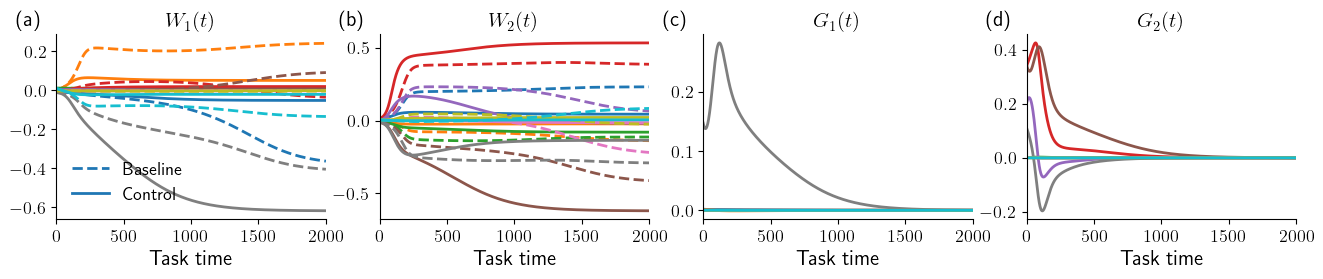

In [4]:
figsize = (16, 6/5*2)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 2000)

two_layer_parameters_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)

plt.savefig("paper_figures/single_task_gaussian_params.pdf", bbox_inches="tight")

In [5]:
results_path = "../results/two_layer_linear/run_id_0_Semantic_27-12-2022_19-41-49-223"
result_manager = ResultsManager(results_path)

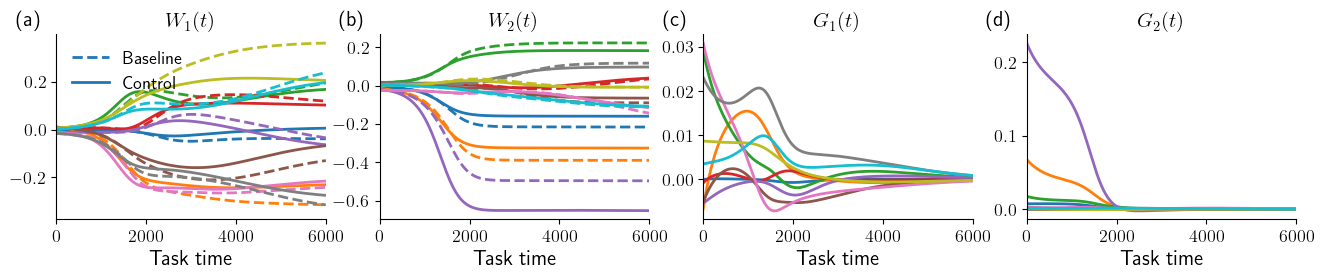

In [6]:
figsize = (16, 6/5*2)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 6000)

two_layer_parameters_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)

plt.savefig("paper_figures/single_task_semantic_params.pdf", bbox_inches="tight")

In [7]:
results_path = "../results/two_layer_linear/run_id_0_MNIST_27-12-2022_21-08-53-766"
result_manager = ResultsManager(results_path)

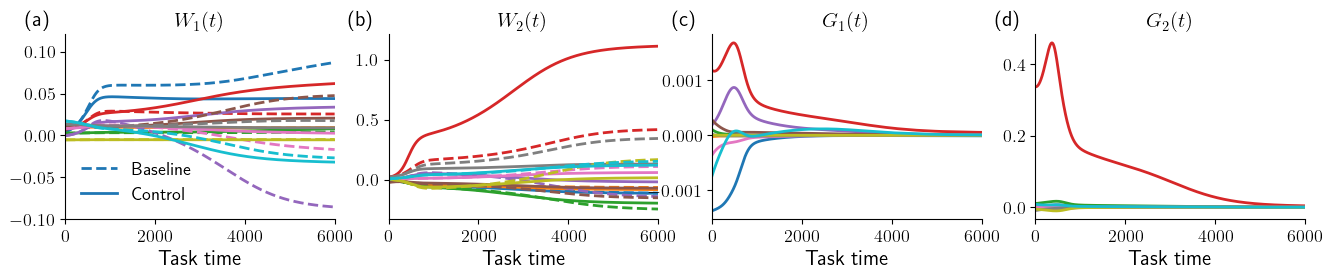

In [8]:
figsize = (16, 6/5*2)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 6000)

two_layer_parameters_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)

plt.savefig("paper_figures/single_task_mnist_params.pdf", bbox_inches="tight")

# Additional results task switch

In [9]:
gaussian_dir_list = glob.glob("../results/task_switch_main/slow_switch_run*_AffineCorrelatedGaussian*")
results = []
for result_dir in gaussian_dir_list:
    results.append(ResultsManager(result_dir))

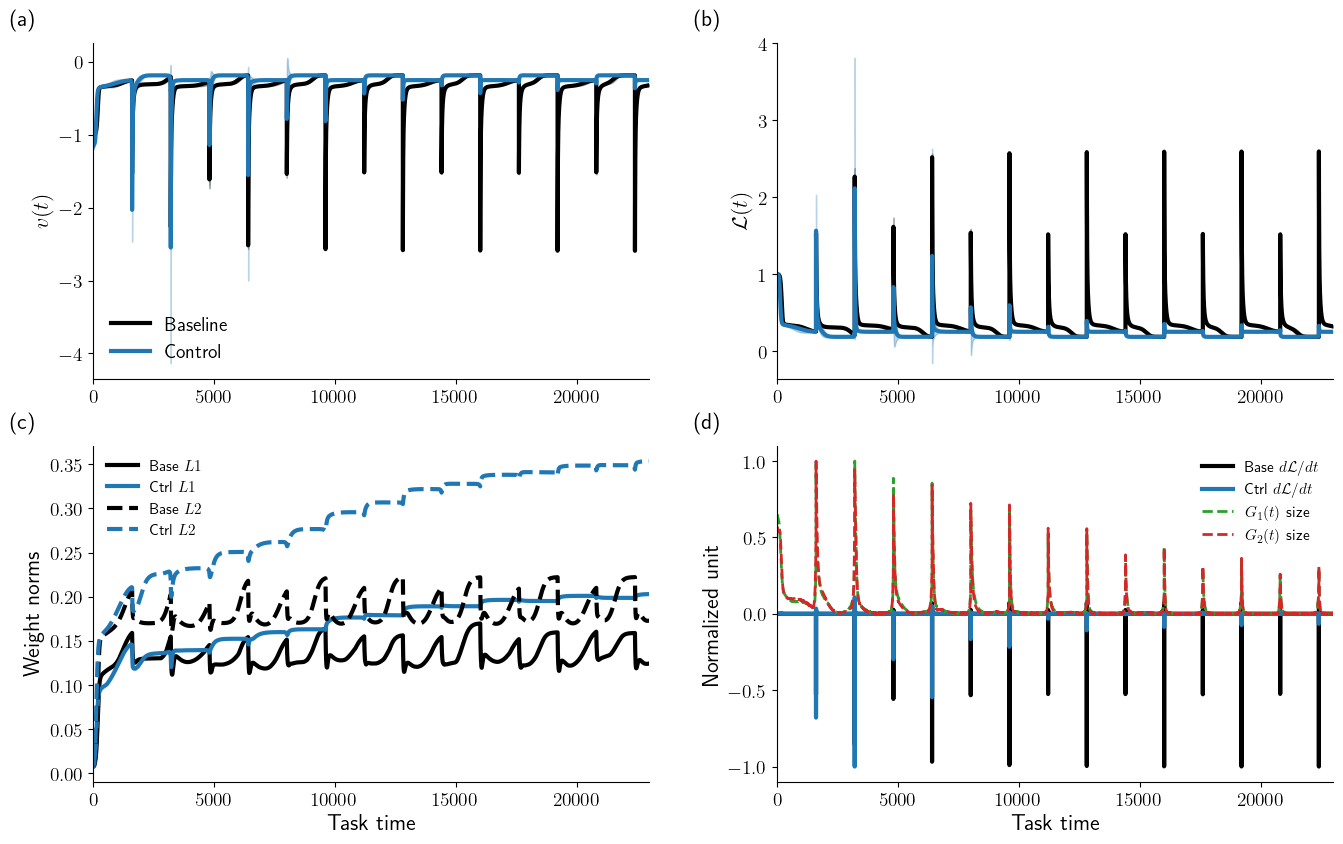

In [10]:
f, ax = plt.subplots(2, 2, figsize=(8*2, 2*6/5*4))
f.subplots_adjust(wspace=0.23)
ax = ax.flatten()
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
ax = single_task_plot(results, ax=ax, fontsize=16, line_width=3, x_lim=(0, 23000), skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels)
plt.savefig("paper_figures/task_switch_summary.pdf", bbox_inches="tight")

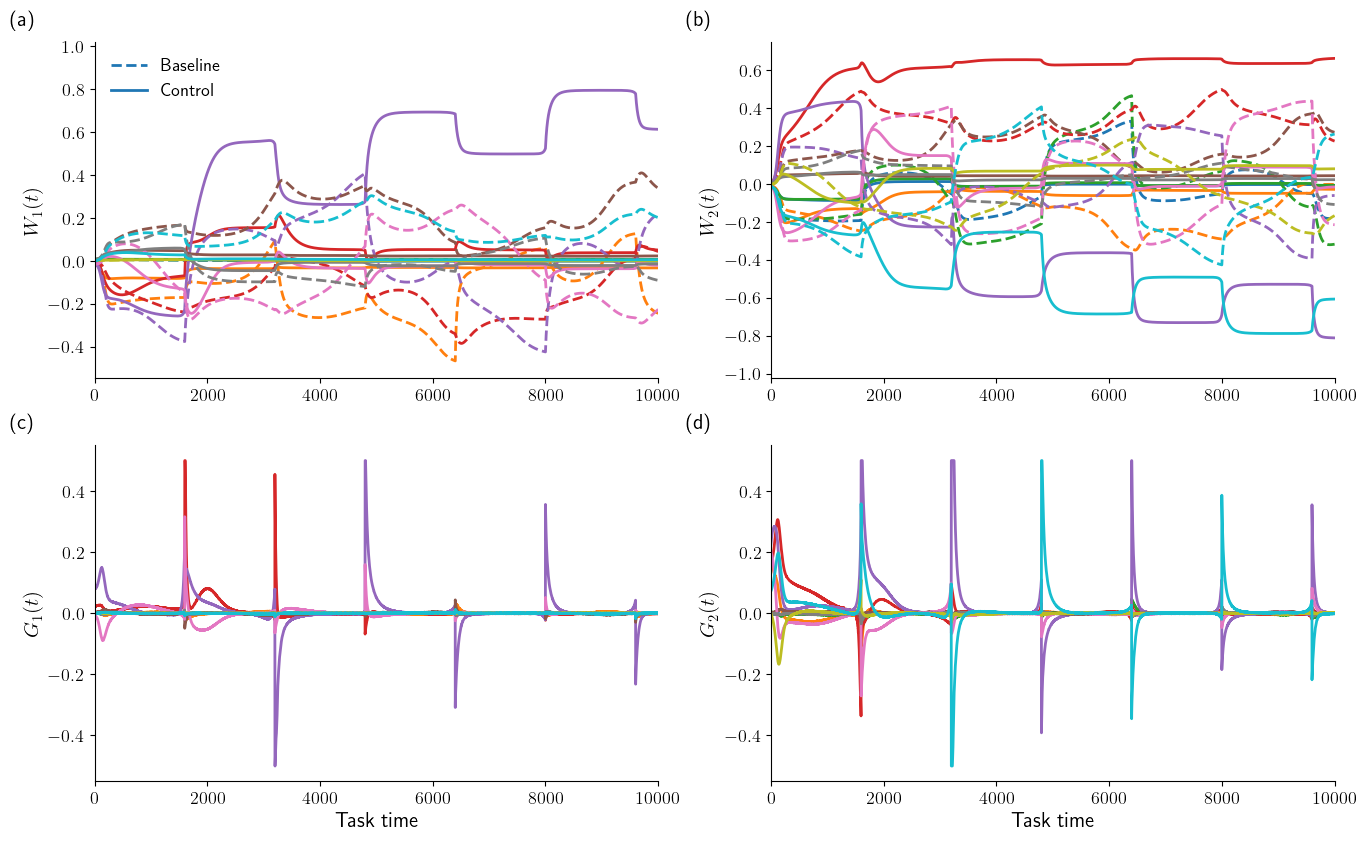

In [13]:
figsize=(8*2, 2*6/5*4)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 10000)
result_manager = results[0]
task_switch_weights_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)
plt.savefig("paper_figures/task_switch_weights.pdf", bbox_inches="tight")

# Non-linear network

In [3]:
results_path = "../results/non_linear_clstr/non_linear_AffineCorrelatedGaussian_18-01-2023_22-27-52-303"
results_manager = ResultsManager(results_path)

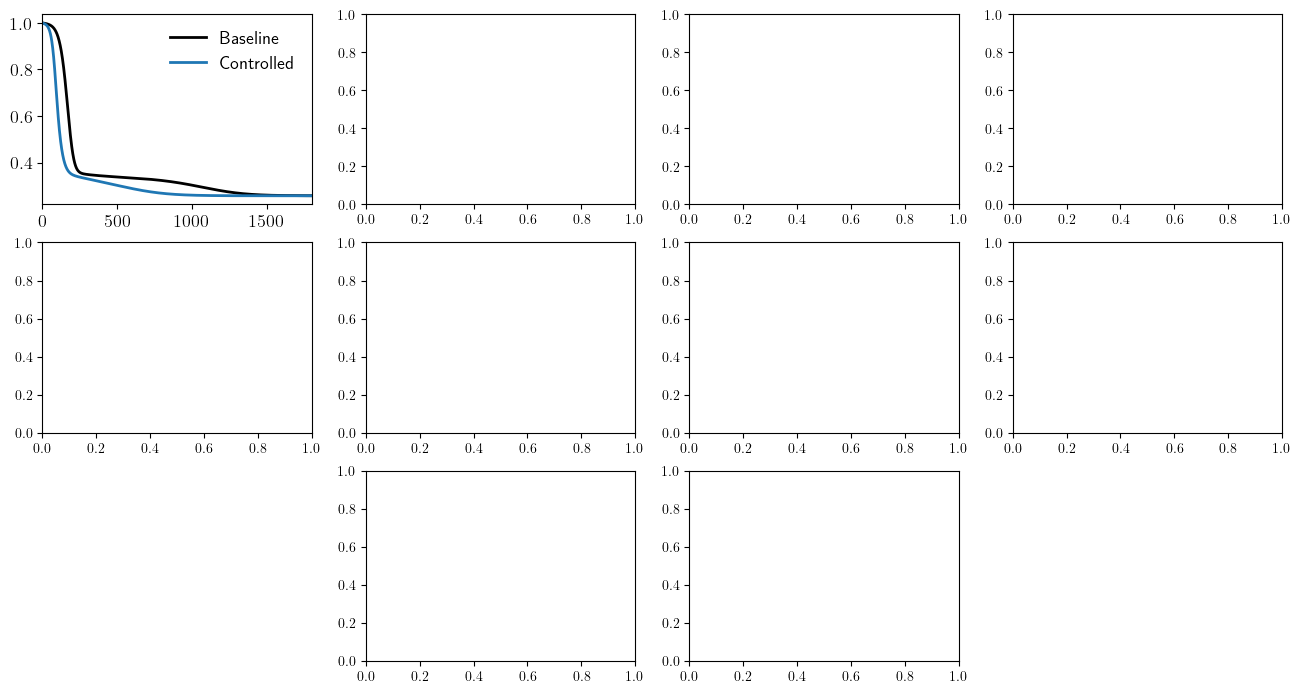

In [4]:
figsize=(8*2, 7/5*6)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array(["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)"])
xlim = (0, 1800)

non_linear_network_plots(results_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)